In [37]:
from __future__ import annotations
import numpy as np
import matplotlib.pyplot as plt

VOWEL = {'a', 'i', 'e', 'o', 'u', 'y'}
EXC_CSN = {'ch', 'sh', 'ts'}
SIMILAR_CSN = [
    {'b', 'f', 'p', 'v'},
    {'c', 'g', 'k'},
    {'d', 't'},
    {'l'},
    {'m', 'n'},
    {'r'},
    {'s', 'sh', 'ts', 'z', 'x'},
    {'w'},
    {'h'},
    {'ch', 'j'},
    {''}
]
csn_sep = {}
for idx, ks in enumerate(SIMILAR_CSN):
    for k in ks: csn_sep[k] = idx

In [28]:
def division(s:str):
    for i in range(len(s)):
        if s[i] in VOWEL:
            return s[:i], s[i:]
    return s, '0'

In [3]:
class Syllable:
    def __init__(self, rom:str, jap:str=None) -> None:
        self.consonant, self.vowel = division(rom)
        self.rom = rom
        self.jap = jap
    
    def sim(self, other:Syllable) -> float:
        score = 0
        # consonant
        if self.consonant == other.consonant: score += 0.5
        elif csn_sep[self.consonant] == csn_sep[other.consonant]: score += 0.25
        # vowel
        if self.vowel == other.vowel: score += 0.5
        elif self.vowel[0] == other.vowel[0]: score += 0.25
        #
        return score
        
    def __repr__(self) -> str:
        return self.rom

In [4]:
def seperation(sentence:str) -> list[Syllable]:
    sentence = sentence.replace(' ', '')
    sl = []; prev = [0]; flag = 0
    def ap(idx):
        sl.append(Syllable(sentence[prev[0]:idx]))
        prev[0] = idx
    def ex_check(ch, idx):
        return (ch == 't' and sentence[idx] == 's') or \
        (ch == 'c' and sentence[idx] == 'h') or (ch == 's' and sentence[idx] == 'h')
    
    for idx, ch in enumerate(sentence, start=1):
        # print(flag, ch)
        if flag == 1:
            flag = 0; ap(idx); continue
        elif flag == 2:
            flag = 0; continue
        #
        if ch in VOWEL:
            if ch == 'y': flag = 1
            else: ap(idx)
        else:
            if flag == 3:
                flag = 0; ap(idx-1)
            #
            if ex_check(ch, idx): flag = 2
            else: flag = 3; continue
        
        if flag == 3: flag = 0
    
    if flag == 3:
        ap(len(sentence))
    
    return sl

In [34]:
def similarity_matrix(original, generated):
    def first_eq(x, y): return x[0] == y[0]

    org, gen = seperation(original), seperation(generated)
    csn_get = np.vectorize(csn_sep.get)
    matgen = lambda x, y, b: \
        np.array([np.tile(sy.consonant if b else sy.vowel, len(y)) for sy in x])
    org_csn_mat, org_vwl_mat = matgen(org, gen, True), matgen(org, gen, False)
    gen_csn_mat, gen_vwl_mat = matgen(gen, org, True).T, matgen(gen, org, False).T

    csn_eq = (org_csn_mat == gen_csn_mat).astype(int) * 0.5
    csn_sim = (csn_get(org_csn_mat) == csn_get(gen_csn_mat)).astype(int) * 0.25
    vwl_eq = (org_vwl_mat == gen_vwl_mat).astype(int) * 0.5
    vwl_sim = (np.vectorize(first_eq)(org_vwl_mat, gen_vwl_mat)).astype(int) * 0.25
    score_mat = np.maximum(csn_eq, csn_sim) + np.maximum(vwl_eq, vwl_sim)
    
    return score_mat

In [52]:
m = similarity_matrix(\
'zenbuzenbumudajanakattatteiukara', 
'zenbu zenbu miidasenakatta tte yuukara')

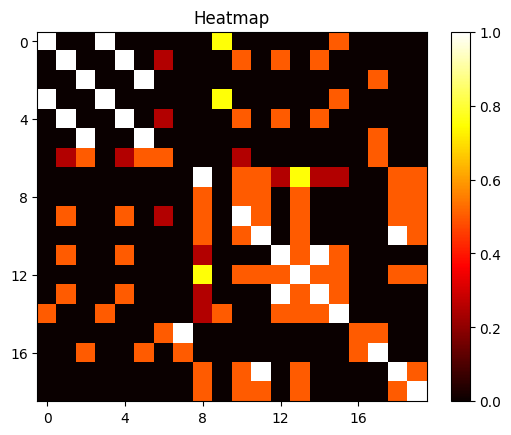

In [53]:
plt.imshow(m, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.title('Heatmap')
plt.xticks(np.arange(0, m.shape[1], 4))
plt.yticks(np.arange(0, m.shape[0], 4))
plt.show()

In [42]:
seperation('shou')

[sho, u]

In [16]:
hex(ord('い'))

'0x3044'